In [1]:
# import all the moduals 

from sqlalchemy.ext.automap import automap_base
from sqlalchemy import create_engine
from sqlalchemy import inspect

# Explore existing DB

In [2]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [3]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [4]:
measurement = inspector.get_columns('measurement')
for columns in measurement:
    print(columns['name'], columns['type'])

engine.execute("SELECT * FROM measurement LIMIT 1").fetchall()

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


[(1, 'USC00519397', '2010-01-01', 0.08, 65.0)]

In [15]:
station = inspector.get_columns('station')
for columns in station:
    print(columns['name'], columns['type'])

engine.execute("SELECT * FROM station LIMIT 2").fetchall()

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6)]

In [6]:
Base = automap_base()
Base.prepare(engine, reflect=True)

Measurement = Base.classes.measurement
Station = Base.classes.station

In [7]:
from sqlalchemy.orm import Session
session = Session(bind=engine)

In [8]:
help(session.query)

Help on method query in module sqlalchemy.orm.session:

query(*entities, **kwargs) method of sqlalchemy.orm.session.Session instance
    Return a new :class:`.Query` object corresponding to this
    :class:`.Session`.



# Climate Analysis - Precipitation Analysis

In [9]:
import datetime
import pandas as pd

In [10]:
# Select Trip start date and end date
trip_start_date = '2017-06-01'                                             
trip_end_date = '2017-06-15'

In [11]:
# Design a query to retrieve the last 12 months of precipitation data.
query = session.query(Measurement.date, Measurement.prcp).\
        filter(Measurement.date > '2016-06-01').filter(Measurement.date < '2017-06-01' ).all()
    
# Select only the `date` and `prcp` values.
preci_df = pd.DataFrame(query)
preci_df.head()

# Load the query results into a Pandas DataFrame and set the index to the date column.
preci_df['date'] = pd.to_datetime(preci_df['date'])

preci_df = preci_df.set_index('date')


# Sort the DataFrame values by `date`.

preci_df.sort_values(by='date').head()


,prcp
date,
2016-06-02,0.00
2016-06-02,NaN
2016-06-02,0.35
2016-06-02,0.50
2016-06-02,0.15


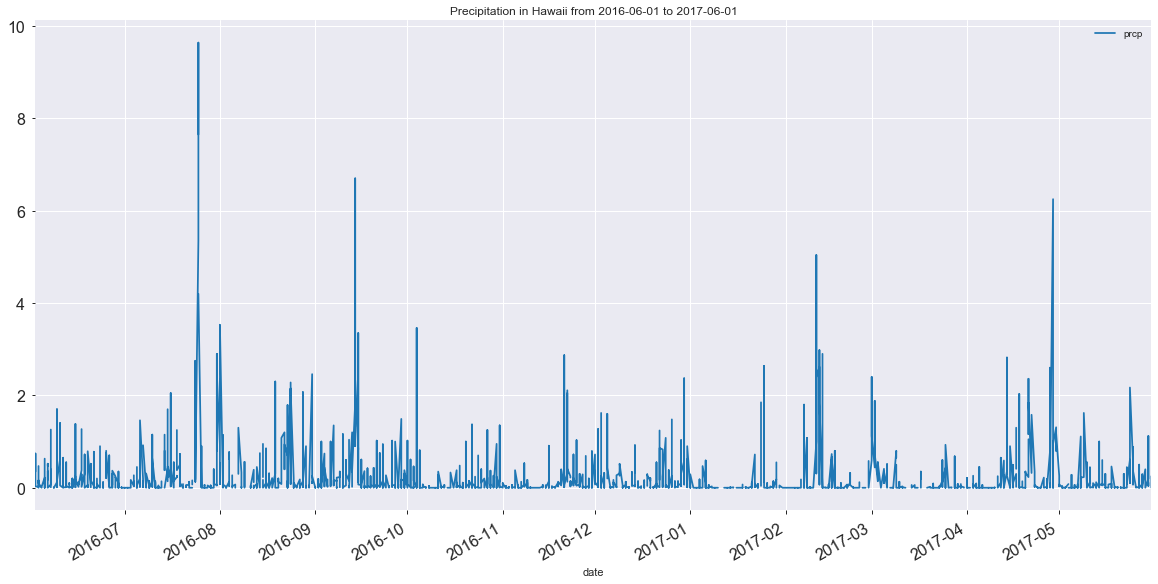

In [55]:
# Plot the results using the DataFrame `plot` method.
import matplotlib.pyplot as plt


preci_df.plot(
    figsize = (20, 10),
    title = "Precipitation in Hawaii from 2016-06-01 to 2017-06-01",
    grid = True,
    legend = True,
    fontsize = 16,
)

In [13]:
# Use Pandas to print the summary statistics for the precipitation data.

preci_df.describe()

,prcp
count,2050.000000
mean,0.215268
std,0.572585
min,0.000000
25%,0.000000
50%,0.020000
75%,0.160000
max,9.640000


In [14]:
# Reporting with pandas_profiling

import pandas_profiling

pandas_profiling.ProfileReport(preci_df)

# Climate Analysis - Station Analysis

In [22]:
# Design a query to calculate the total number of stations.

query = session.query(Station.id).count()
print(f"There are totally {query} stations.")

There are totally 9 stations.


In [25]:
# Design a query to find the most active stations.
# List the stations and observation counts in descending order.
# Which station has the highest number of observations?

from sqlalchemy import func, desc

query_station = session.query(Station.id, Station.name, func.count(Measurement.station)).\
                filter(Measurement.station == Station.station).group_by(Measurement.station).\
                order_by(func.count(Measurement.station).desc()).all()

query_station

[(7, 'WAIHEE 837.5, HI US', 2772),
 (1, 'WAIKIKI 717.2, HI US', 2724),
 (2, 'KANEOHE 838.1, HI US', 2709),
 (6, 'WAIMANALO EXPERIMENTAL FARM, HI US', 2669),
 (9, 'MANOA LYON ARBO 785.2, HI US', 2612),
 (3, 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 2202),
 (8, 'HONOLULU OBSERVATORY 702.2, HI US', 1979),
 (4, 'PEARL CITY, HI US', 1372),
 (5, 'UPPER WAHIAWA 874.3, HI US', 511)]

In [56]:
# Design a query to retrieve the last 12 months of temperature observation data (tobs).
# Filter by the station with the highest number of observations.

query_temp = session.query(Measurement.date, Measurement.tobs).\
             filter(Station.station == Measurement.station).\
             filter(Station.name == 'WAIHEE 837.5, HI US').\
             filter(Measurement.date > '2016-06-01').filter(Measurement.date < '2017-06-01' ).all()

query_temp

[('2016-06-02', 67.0),
 ('2016-06-03', 68.0),
 ('2016-06-04', 65.0),
 ('2016-06-05', 70.0),
 ('2016-06-06', 72.0),
 ('2016-06-07', 74.0),
 ('2016-06-08', 73.0),
 ('2016-06-09', 71.0),
 ('2016-06-10', 75.0),
 ('2016-06-11', 72.0),
 ('2016-06-12', 75.0),
 ('2016-06-13', 76.0),
 ('2016-06-14', 75.0),
 ('2016-06-15', 76.0),
 ('2016-06-16', 75.0),
 ('2016-06-17', 71.0),
 ('2016-06-18', 75.0),
 ('2016-06-19', 75.0),
 ('2016-06-20', 72.0),
 ('2016-06-21', 72.0),
 ('2016-06-22', 75.0),
 ('2016-06-23', 73.0),
 ('2016-06-24', 76.0),
 ('2016-06-25', 74.0),
 ('2016-06-26', 77.0),
 ('2016-06-27', 72.0),
 ('2016-06-28', 71.0),
 ('2016-06-29', 76.0),
 ('2016-06-30', 77.0),
 ('2016-07-01', 76.0),
 ('2016-07-02', 79.0),
 ('2016-07-03', 76.0),
 ('2016-07-04', 79.0),
 ('2016-07-05', 75.0),
 ('2016-07-06', 74.0),
 ('2016-07-07', 73.0),
 ('2016-07-08', 78.0),
 ('2016-07-09', 80.0),
 ('2016-07-10', 72.0),
 ('2016-07-11', 79.0),
 ('2016-07-12', 80.0),
 ('2016-07-13', 76.0),
 ('2016-07-14', 80.0),
 ('2016-07-

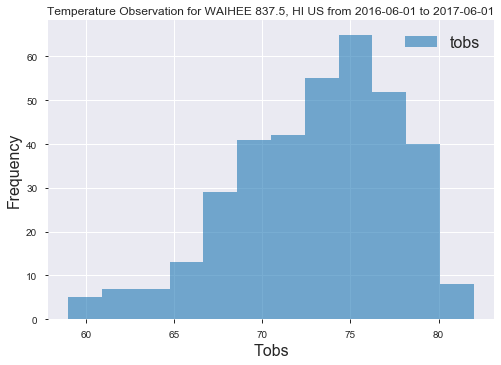

In [54]:
# Plot the results as a histogram with `bins=12`

# Define the list for plot
temp = [temp[1] for temp in query_temp]

plt.hist(temp, bins=12, alpha=0.6)               
plt.title("Temperature Observation for WAIHEE 837.5, HI US from 2016-06-01 to 2017-06-01")
plt.ylabel('Frequency', fontsize=16)
plt.xlabel('Temperature', fontsize=16)
plt.legend(labels, fontsize=16)
plt.show()